In [13]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\heart_attack_youth_vs_adult_pakistan.csv')
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 1.45 seconds

Missing values: 133631
Duplicated values: 199994

Missing values by column:
Age                         0
Gender                      0
Region                      0
BMI                         0
Smoker                      0
Diabetes                    0
Hypertension                0
Cholesterol_Level           0
Physical_Activity           0
Diet                        0
Family_History              0
Stress_Level                0
Alcohol_Consumption         0
Drug_Use                    0
Sleep_Hours                 0
Blood_Pressure              0
Heart_Rate                  0
Chest_Pain                  0
ECG_Results                 0
Blood_Sugar                 0
Angina                      0
Cardiac_Arrest              0
Recovery_Status             0
Medication                  0
Follow_Up              133631
dtype: int64

Unique Values in Each Column:
Age                      66
Gende

In [14]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Text Columns:", non_numerical_columns)


Numerical Columns: ['Age', 'BMI', 'Cholesterol_Level', 'Sleep_Hours', 'Blood_Pressure', 'Heart_Rate', 'Blood_Sugar']
Text Columns: ['Gender', 'Region', 'Smoker', 'Diabetes', 'Hypertension', 'Physical_Activity', 'Diet', 'Family_History', 'Stress_Level', 'Alcohol_Consumption', 'Drug_Use', 'Chest_Pain', 'ECG_Results', 'Angina', 'Cardiac_Arrest', 'Recovery_Status', 'Medication', 'Follow_Up']


In [15]:
df.head()

,Age,Gender,Region,BMI,Smoker,Diabetes,Hypertension,Cholesterol_Level,Physical_Activity,Diet,...,Blood_Pressure,Heart_Rate,Chest_Pain,ECG_Results,Blood_Sugar,Angina,Cardiac_Arrest,Recovery_Status,Medication,Follow_Up
0,74,Female,Urban,32.1,Yes,Yes,Yes,111.5,Moderate,Healthy,...,162,52,No,Abnormal,102.0,No,Yes,Ongoing,Yes,Irregular
1,68,Male,Urban,38.3,Yes,Yes,No,276.3,High,Healthy,...,150,97,No,Normal,186.9,Yes,No,Deceased,Yes,Regular
2,50,Male,Urban,31.3,Yes,Yes,Yes,134.9,High,Unhealthy,...,98,67,Yes,Normal,71.4,No,Yes,Ongoing,No,NaN
3,29,Male,Urban,34.0,No,No,No,224.8,High,Healthy,...,99,87,No,Normal,191.0,No,No,Recovered,Yes,Regular
4,62,Male,Urban,25.1,No,No,No,128.0,Moderate,Healthy,...,128,89,No,Abnormal,184.1,Yes,No,Recovered,No,Irregular


In [16]:
df = df.drop(columns=['Region', 'Family_History', 'Recovery_Status', 'Follow_Up'])

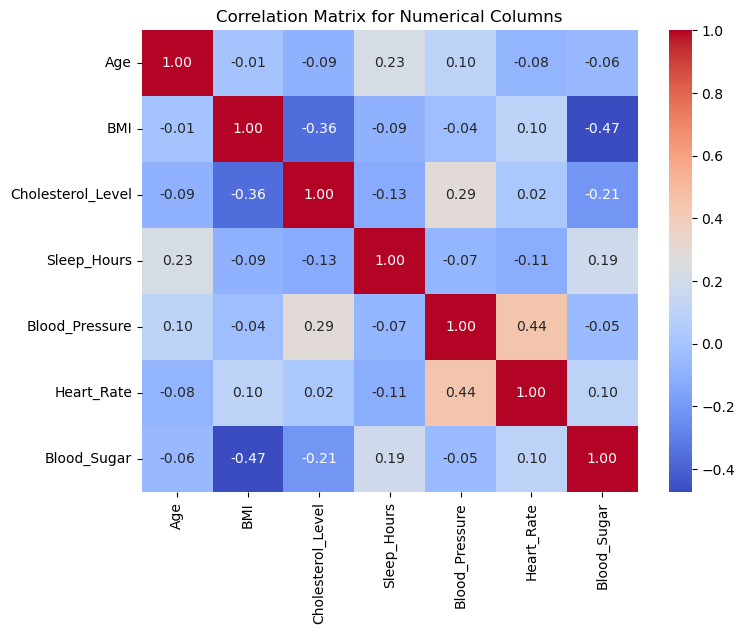

In [17]:
import seaborn as sns
df_sampled = df.sample(n=20)
numerical_columns = df_sampled.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix = df_sampled[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Union
import numpy as np


def plot_categorical_relationships(
    Categorical_Columns: str = "",
    data: pd.DataFrame = df,
    Numerical_Columns: str = "",
    top_n: int = 10,
    title_prefix: str = "Analysis",
    figsize: tuple = (18, 5),
    palette: str = "muted",
    rotation: int = 45,
    min_count: int = 1,
    sample_data: int = 30,
) -> None:


    if not isinstance(data, pd.DataFrame):
        raise ValueError("data must be a pandas DataFrame")
    if Categorical_Columns not in data.columns:
        raise ValueError(f"Column '{Categorical_Columns}' not found in DataFrame")
    if Numerical_Columns not in data.columns:
        raise ValueError(f"Target column '{Numerical_Columns}' not found in DataFrame")
    if top_n < 1:
        raise ValueError("top_n must be positive")
    if len(data) > sample_data:
        print(f"Data has {len(data)} rows. Sampling {sample_data} rows for analysis.")
        data = data.sample(n=sample_data)
  
    value_counts = data[Categorical_Columns].value_counts()
    valid_categories = value_counts[value_counts >= min_count].head(top_n).index


    if len(valid_categories) == 0:
        print("No categories meet the minimum count criterion")
        return


    filtered_data = data[data[Categorical_Columns].isin(valid_categories)].copy()


    category_order = filtered_data[Categorical_Columns].value_counts().index


    plt.figure(figsize=figsize)


    plt.subplot(1, 3, 1)
    avg_value = filtered_data.groupby(Categorical_Columns)[Numerical_Columns].agg(["mean", "count"])
    sns.barplot(
        x=avg_value.index,
        y="mean",
        data=avg_value,
        order=category_order,
        palette=palette,
    )
    plt.title(
        f"{title_prefix}\nAverage {Numerical_Columns} by {Categorical_Columns}\n(Top {len(valid_categories)})"
    )
    plt.xlabel(f"{Categorical_Columns}\n(n=samples in each category)")
    plt.ylabel(f"Average {Numerical_Columns}")
    plt.xticks(rotation=rotation)


    for i, count in enumerate(avg_value["count"]):
        plt.text(i, 0, f"n={count}", ha="center", va="bottom")


    plt.subplot(1, 3, 2)
    sns.boxplot(
        x=Categorical_Columns,
        y=Numerical_Columns,
        data=filtered_data,
        order=category_order,
        palette=palette,
    )
    plt.title(f"{title_prefix}\n{Numerical_Columns} Distribution by {Categorical_Columns}")
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=rotation)


    plt.subplot(1, 3, 3)
    sns.violinplot(
        x=Categorical_Columns,
        y=Numerical_Columns,
        data=filtered_data,
        order=category_order,
        palette=palette,
        legend=False,
    )
    plt.title(f"{title_prefix}\n{Numerical_Columns} Distribution (Violin) by {Categorical_Columns}")
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=rotation)
    print(filtered_data[Categorical_Columns].value_counts())
    plt.tight_layout()
    plt.show()

Data has 399994 rows. Sampling 101 rows for analysis.
Cardiac_Arrest
No     59
Yes    42
Name: count, dtype: int64


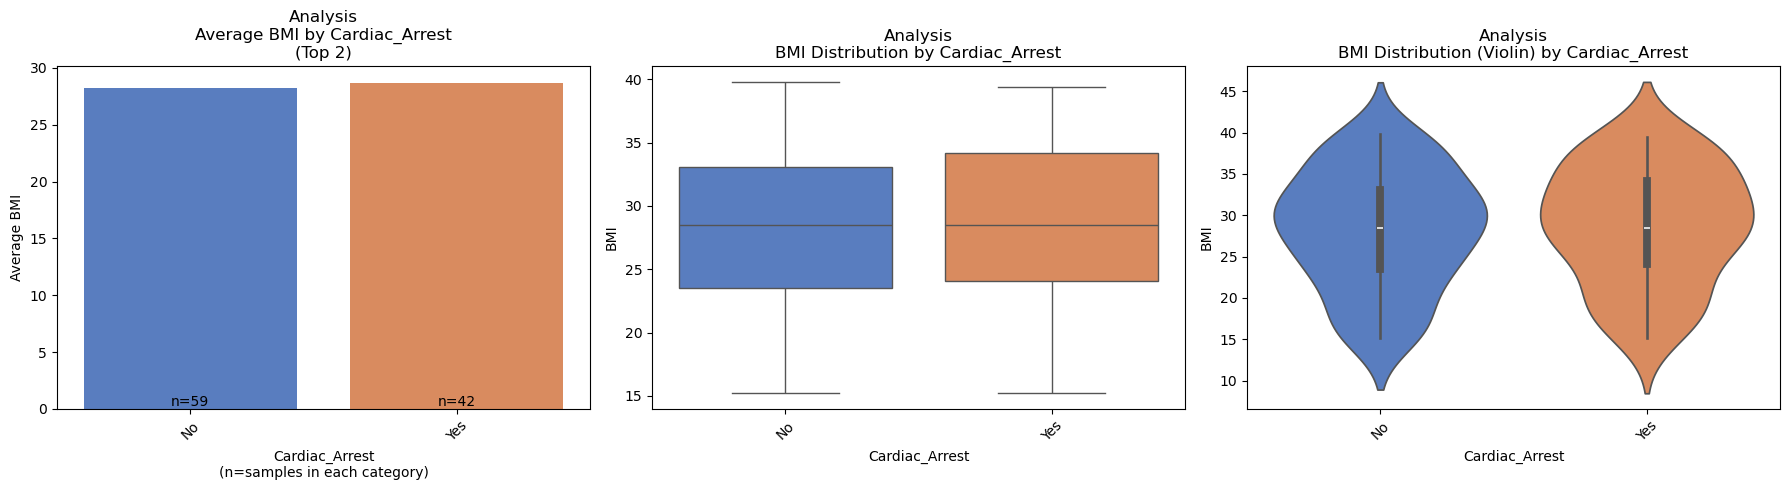

Data has 399994 rows. Sampling 101 rows for analysis.
Cardiac_Arrest
Yes    51
No     50
Name: count, dtype: int64


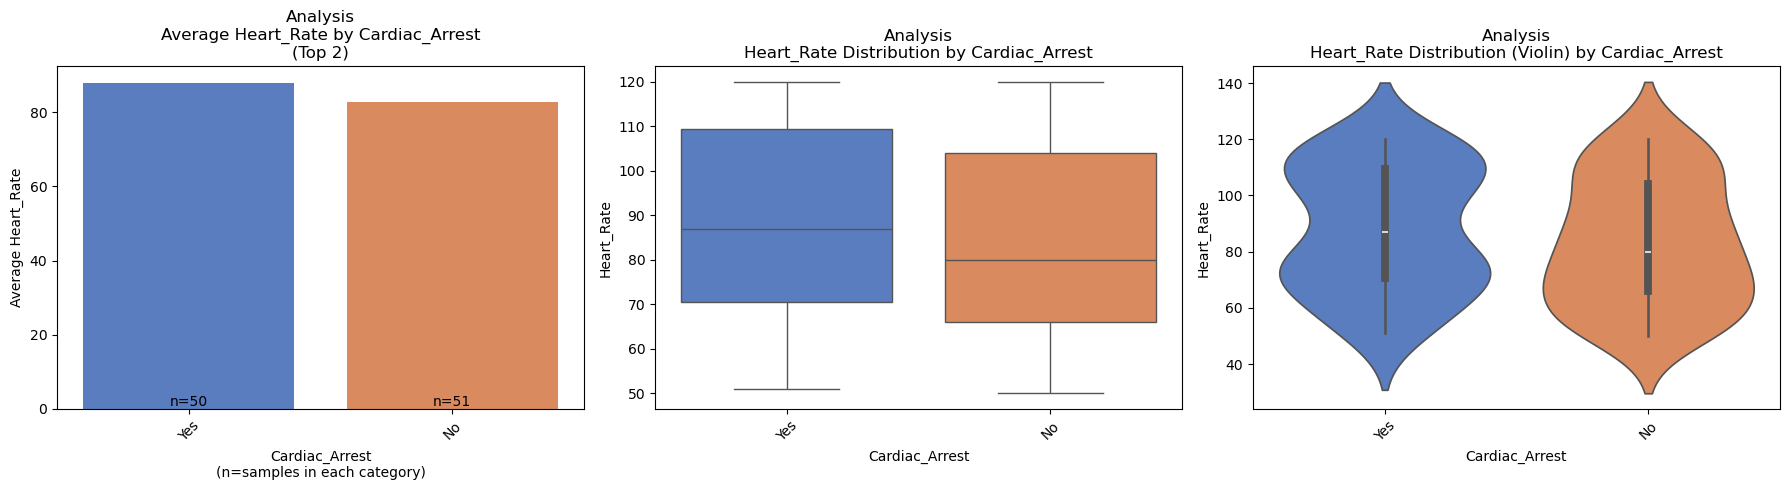

Data has 399994 rows. Sampling 101 rows for analysis.
Cardiac_Arrest
No     53
Yes    48
Name: count, dtype: int64


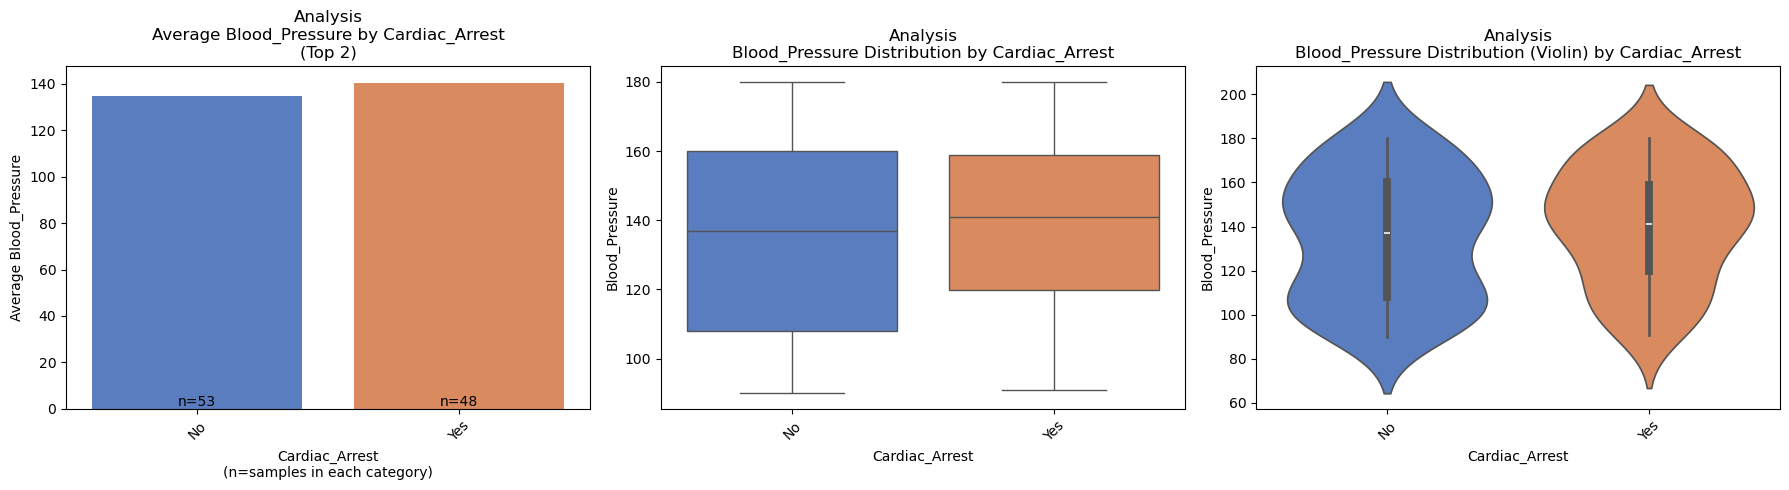

In [19]:
plot_categorical_relationships(Categorical_Columns="Cardiac_Arrest", Numerical_Columns="BMI",sample_data=101)
plot_categorical_relationships(Categorical_Columns="Cardiac_Arrest", Numerical_Columns="Heart_Rate",sample_data=101)
plot_categorical_relationships(Categorical_Columns="Cardiac_Arrest", Numerical_Columns="Blood_Pressure",sample_data=101)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Gender
0 -> Female
1 -> Male

Column: Smoker
0 -> No
1 -> Yes

Column: Diabetes
0 -> No
1 -> Yes

Column: Hypertension
0 -> No
1 -> Yes

Column: Physical_Activity
0 -> High
1 -> Low
2 -> Moderate

Column: Diet
0 -> Healthy
1 -> Unhealthy

Column: Stress_Level
0 -> High
1 -> Low
2 -> Moderate

Column: Alcohol_Consumption
0 -> No
1 -> Yes

Column: Drug_Use
0 -> No
1 -> Yes

Column: Chest_Pain
0 -> No
1 -> Yes

Column: ECG_Results
0 -> Abnormal
1 -> Normal

Column: Angina
0 -> No
1 -> Yes

Column: Cardiac_Arrest
0 -> No
1 -> Yes

Column: Medication
0 -> No
1 -> Yes



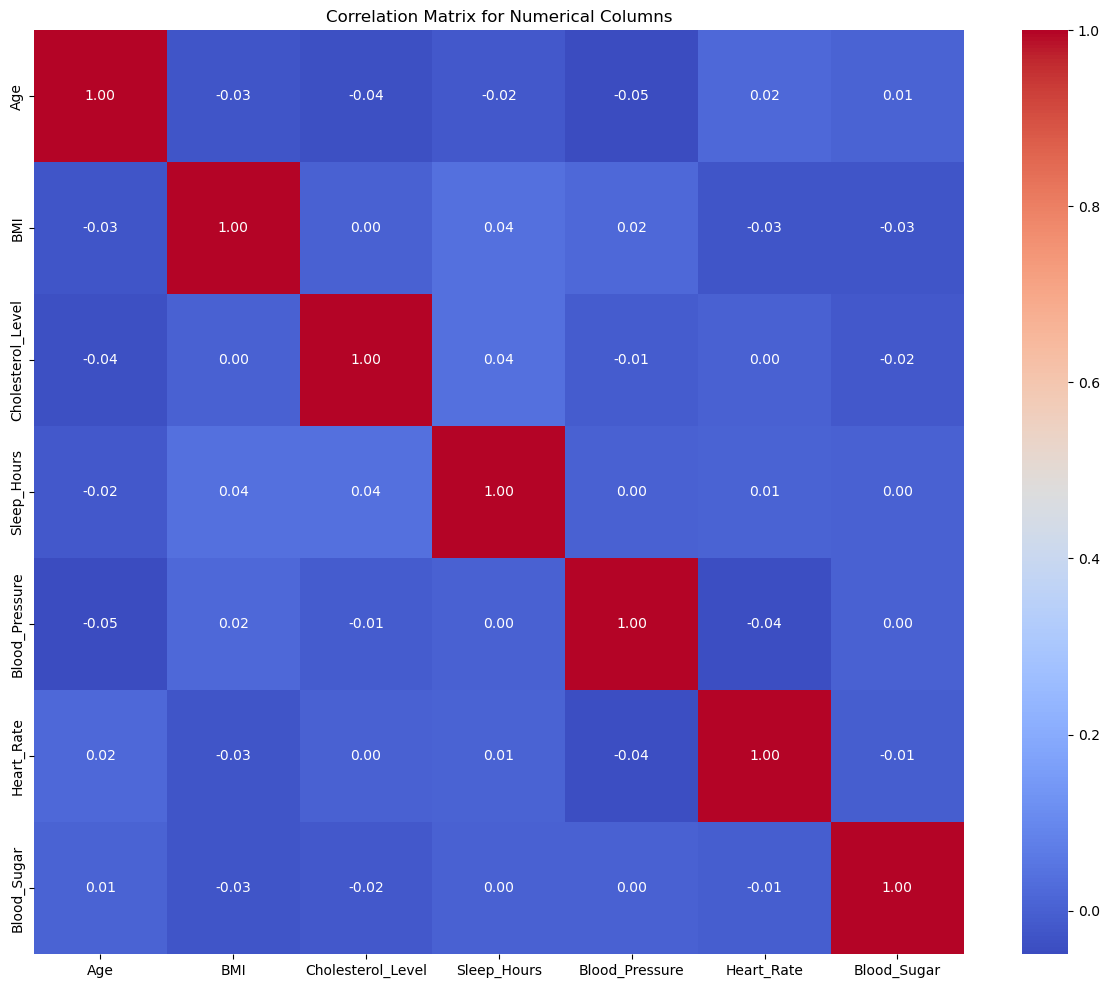

In [22]:
df_sampled = df.sample(n=1000)
numerical_columns = df_sampled.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix = df_sampled[numerical_columns].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

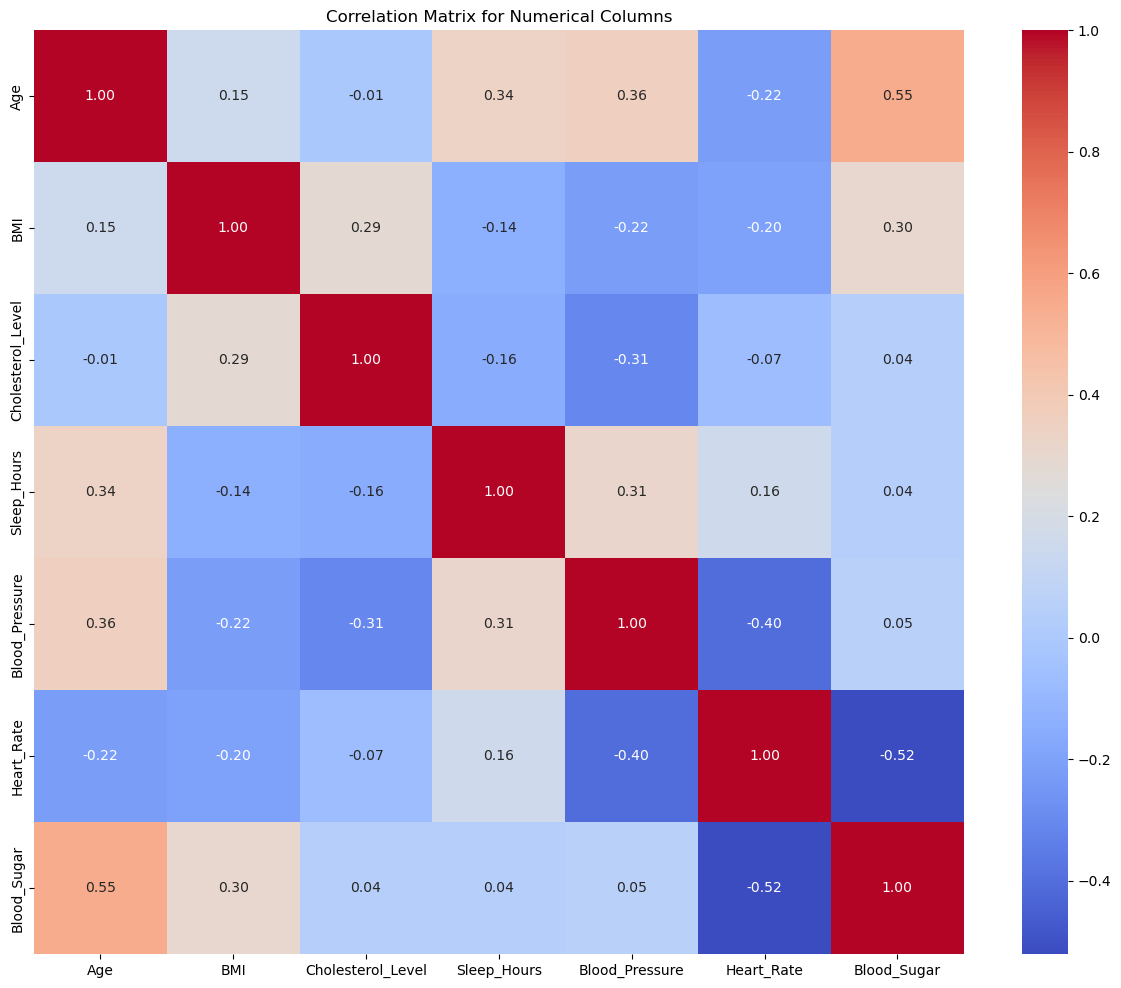

In [23]:
df_sampled = df.sample(n=15)
numerical_columns = df_sampled.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix = df_sampled[numerical_columns].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('Cardiac_Arrest',axis = 1)
y = df['Cardiac_Arrest']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape,X_test.shape)

(299995, 20) (99999, 20)


Classification Accuracy: 0.8790087900879009
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     50018
           1       0.88      0.87      0.88     49981

    accuracy                           0.88     99999
   macro avg       0.88      0.88      0.88     99999
weighted avg       0.88      0.88      0.88     99999



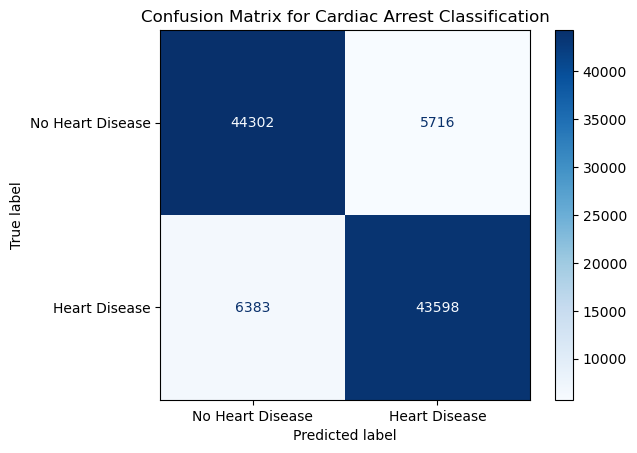

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



clf = RandomForestClassifier()
clf.fit(X_train, y_train)


y_pred_class = clf.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))


cm = confusion_matrix(y_test, y_pred_class)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Cardiac Arrest Classification")
plt.show()